In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import pprint
import json
from time import sleep
from datetime import date
from sqlalchemy import create_engine
import os
from glob import glob

In [2]:
#Imported the csv files
rawdf_BigDance = pd.read_csv('Big_Dance_CSV.csv', low_memory=False)
rawdf_cbb = pd.read_csv('FinalData.csv', low_memory=False)

In [3]:
# rawdf_cbb.assign(Winning_Team="")

In [4]:
#First step into creating a column for Winning Team if home team won
a=rawdf_cbb.loc[rawdf_cbb['Home_Score'] > rawdf_cbb['Away_Score'], ["Home_Team"] ]
a2=a.rename(columns={"Home_Team":"Winning_Team"})
# a2.head(10)

In [5]:
#Second step into creating a column for Winning Team if away team won
b=rawdf_cbb.loc[rawdf_cbb['Home_Score'] < rawdf_cbb['Away_Score'], ["Away_Team"] ]
b2=b.rename(columns={"Away_Team":"Winning_Team"})
# b2.head(10)

In [6]:
#Combining the results to create Winning Team column sorted by index column
Winning_Team=pd.concat([a2, b2]).sort_index()
# Winning_Team.head(15)

In [7]:
#Adding the Winning Team column to the data frame
rawdf_cbb['Winning_Team'] = Winning_Team
# rawdf_cbb

In [8]:
#Repeating the steps all over again to create a Winning Seed column and adding to the data frame
c=rawdf_cbb.loc[rawdf_cbb['Home_Score'] > rawdf_cbb['Away_Score'], ["Home_Seed"] ]
c2=c.rename(columns={"Home_Seed":"Winning_Seed"})
d=rawdf_cbb.loc[rawdf_cbb['Home_Score'] < rawdf_cbb['Away_Score'], ["Away_Seed"] ]
d2=d.rename(columns={"Away_Seed":"Winning_Seed"})
Winning_Seed=pd.concat([c2, d2]).sort_index()
rawdf_cbb['Winning_Seed'] = Winning_Seed
# rawdf_cbb

In [9]:
#Repeating the steps all over again to create a Winning Conference column and adding to the data frame
e=rawdf_cbb.loc[rawdf_cbb['Home_Score'] > rawdf_cbb['Away_Score'], ["Home_Conference"] ]
e2=e.rename(columns={"Home_Conference":"Winning_Conference"})
f=rawdf_cbb.loc[rawdf_cbb['Home_Score'] < rawdf_cbb['Away_Score'], ["Away_Conference"] ]
f2=f.rename(columns={"Away_Conference":"Winning_Conference"})
Winning_Conference=pd.concat([e2, f2]).sort_index()
rawdf_cbb['Winning_Conference'] = Winning_Conference
rawdf_cbb

,Year,Round,Region Number,Region Name,Home_Seed,Home_Score,Home_Team,Away_Team,Away_Score,Away_Seed,Home_Conference,Away_Conference,Winning_Team,Winning_Seed,Winning_Conference
0,2015,1,1,Midwest,6,56,Butler,Texas,48,11,BE,B12,Butler,6,BE
1,2015,1,1,Midwest,3,69,Notre Dame,Northeastern,65,14,ACC,CAA,Notre Dame,3,ACC
2,2015,1,1,Midwest,5,68,West Virginia,Buffalo,62,12,B12,MAC,West Virginia,5,B12
3,2015,1,1,Midwest,2,75,Kansas,New Mexico St,56,15,B12,WAC,Kansas,2,B12
4,2015,1,1,Midwest,8,66,Cincinnati,Purdue,65,9,Amer,B10,Cincinnati,8,Amer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,2019,4,3,East,1,80,Virginia,Purdue,75,3,ACC,B10,Virginia,1,ACC
297,2019,4,4,Midwest,5,77,Auburn,Kentucky,71,2,SEC,SEC,Auburn,5,SEC
298,2019,5,1,Final Four,2,51,Michigan St,Texas Tech,61,3,B10,B12,Texas Tech,3,B12
299,2019,5,2,Final Four,1,63,Virginia,Auburn,62,5,ACC,SEC,Virginia,1,ACC


In [10]:
#Adding Winnning Team Column for BigDance csv
g=rawdf_BigDance.loc[rawdf_BigDance['Score'] > rawdf_BigDance['Score.1'], ["Team"] ]
g2=g.rename(columns={"Team":"Winning_Team"})
h=rawdf_BigDance.loc[rawdf_BigDance['Score'] < rawdf_BigDance['Score.1'], ["Team.1"] ]
h2=h.rename(columns={"Team.1":"Winning_Team"})
Winning_Team=pd.concat([g2, h2]).sort_index()
rawdf_BigDance['Winning_Team'] = Winning_Team
# rawdf_BigDance

In [11]:
#Adding Winnning Seed Column for BigDance csv
i=rawdf_BigDance.loc[rawdf_BigDance['Score'] > rawdf_BigDance['Score.1'], ["Seed"] ]
i2=i.rename(columns={"Seed":"Winning_Seed"})
j=rawdf_BigDance.loc[rawdf_BigDance['Score'] < rawdf_BigDance['Score.1'], ["Seed.1"] ]
j2=j.rename(columns={"Seed.1":"Winning_Seed"})
Winning_Seed=pd.concat([i2, j2]).sort_index()
rawdf_BigDance['Winning_Seed'] = Winning_Seed
rawdf_BigDance

,Year,Round,Region Number,Region Name,Seed,Score,Team,Team.1,Score.1,Seed.1,Winning_Team,Winning_Seed
0,1985,1,1,West,1,83,St Johns,Southern,59,16,St Johns,1
1,1985,1,1,West,2,81,VCU,Marshall,65,15,VCU,2
2,1985,1,1,West,3,65,NC State,Nevada,56,14,NC State,3
3,1985,1,1,West,4,85,UNLV,San Diego St,80,13,UNLV,4
4,1985,1,1,West,5,58,Washington,Kentucky,65,12,Kentucky,12
...,...,...,...,...,...,...,...,...,...,...,...,...
2200,2019,4,3,East,1,80,Virginia,Purdue,75,3,Virginia,1
2201,2019,4,4,Midwest,5,77,Auburn,Kentucky,71,2,Auburn,5
2202,2019,5,1,Final Four,2,51,Michigan St,Texas Tech,61,3,Texas Tech,3
2203,2019,5,2,Final Four,1,63,Virginia,Auburn,62,5,Virginia,1


In [12]:
cbbInfo=rawdf_cbb.describe()
cbbInfo[['Home_Score','Away_Score']]
#from this we can see that on average the home team tends to score higher that the away team 

,Home_Score,Away_Score
count,301.000000,301.000000
mean,73.684385,68.408638
std,11.890475,11.097558
min,43.000000,39.000000
25%,65.000000,61.000000
50%,73.000000,69.000000
75%,83.000000,76.000000
max,105.000000,99.000000


In [13]:
BigDanceInfo=rawdf_BigDance.describe()
BigDanceInfo[["Score", "Score.1"]]
#same as the data from the last 5 years, the data since '85 it seems that home team score on avg higher than away team

,Score,Score.1
count,2205.000000,2205.000000
mean,74.304308,68.051701
std,12.753399,12.295443
min,32.000000,29.000000
25%,65.000000,59.000000
50%,74.000000,67.000000
75%,82.000000,76.000000
max,131.000000,149.000000


In [14]:
#this is the team with the most wins...North Carolina with the data from the last 5 years
winningteam_count=rawdf_cbb.groupby(['Winning_Team'])
data=winningteam_count.count()
dataSorted=data.sort_values(["Winning_Conference"],ascending=False).head(1)
dataSorted[["Round"]]

,Round
Winning_Team,
North Carolina,16


In [15]:
#one of the many teams with the least amount of wins
dataSorted2=data.sort_values(["Winning_Conference"],ascending=True).head(1)
dataSorted2[["Round"]]

,Round
Winning_Team,
Alabama,1


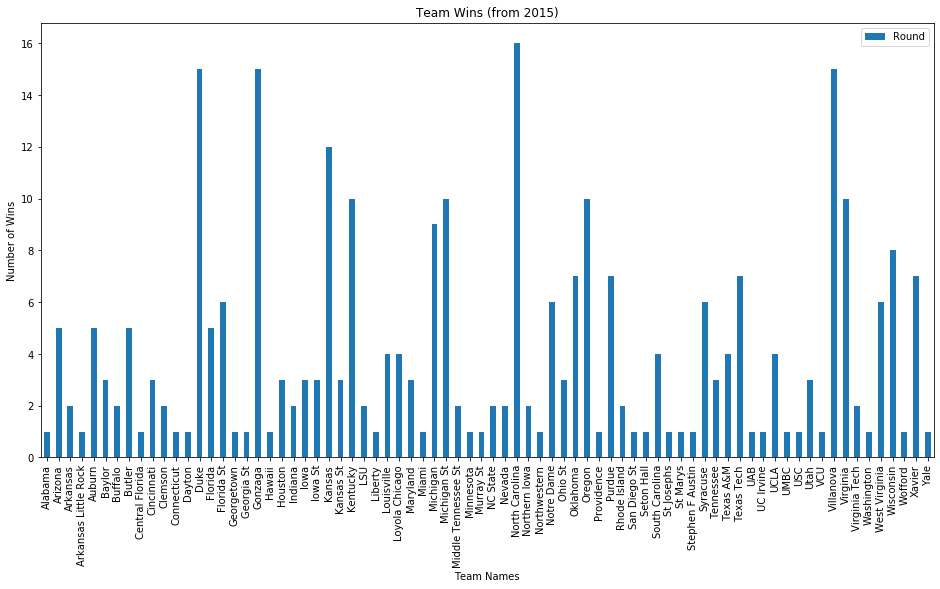

In [16]:
#Bar chart of wins from 2015 to most current
ax = data.plot.bar(y='Round', figsize=(16,8))
ax.set_title("Team Wins (from 2015)")
plt.ylabel("Number of Wins")
plt.xlabel("Team Names")
plt.savefig('output_data/team_wins.png')

In [17]:
#Team with the most wins since '85 is Duke
wteam_count=rawdf_BigDance.groupby(['Winning_Team'])
data2=wteam_count.count()
data2Sorted=data2.sort_values(["Winning_Seed"], ascending=False).head(1)
data2Sorted[["Round"]]

,Round
Winning_Team,
Duke,97


In [18]:
#One of the many teams with only 1 win since '85
data2Sorted2=data2.sort_values(["Winning_Seed"],ascending=True).head(1)
data2Sorted2[["Round"]]

,Round
Winning_Team,
Yale,1


Text(0.5, 0, 'Team Names')

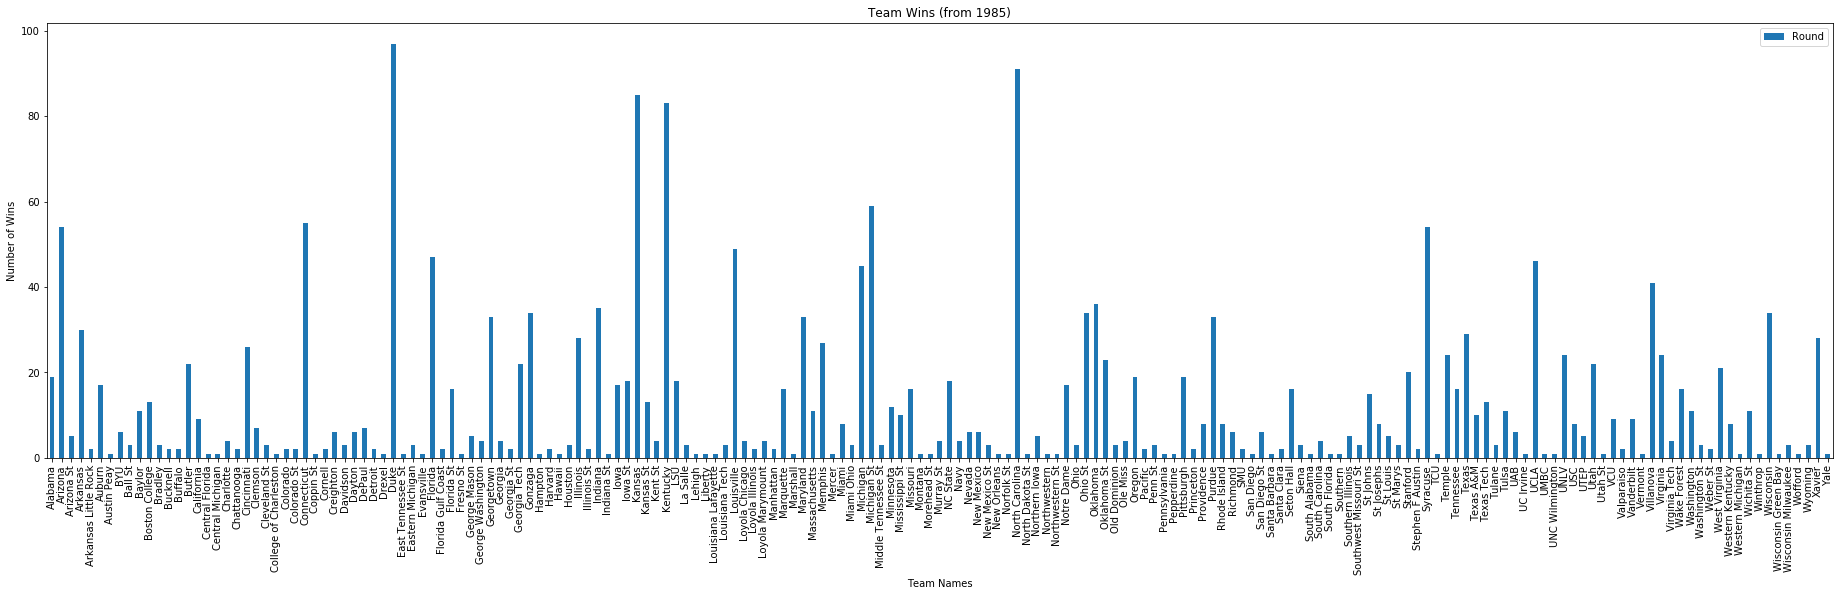

In [19]:
#Bar chart of wins from '85 to most current
ax = data2.plot.bar(y='Round', figsize=(32,8))
ax.set_title("Team Wins (from 1985)")
plt.ylabel("Number of Wins")
plt.xlabel("Team Names")

In [20]:
#The Conference with the most wins in the past five years is ACC
#North Carolina is part of this Conference
winningConference_count=rawdf_cbb.groupby(['Winning_Conference'])
dt=winningConference_count.count()
dtSorted=dt.sort_values(["Winning_Team"],ascending=False).head(5)
dtSorted[["Round"]]

,Round
Winning_Conference,
ACC,70
B10,47
B12,41
SEC,36
BE,30


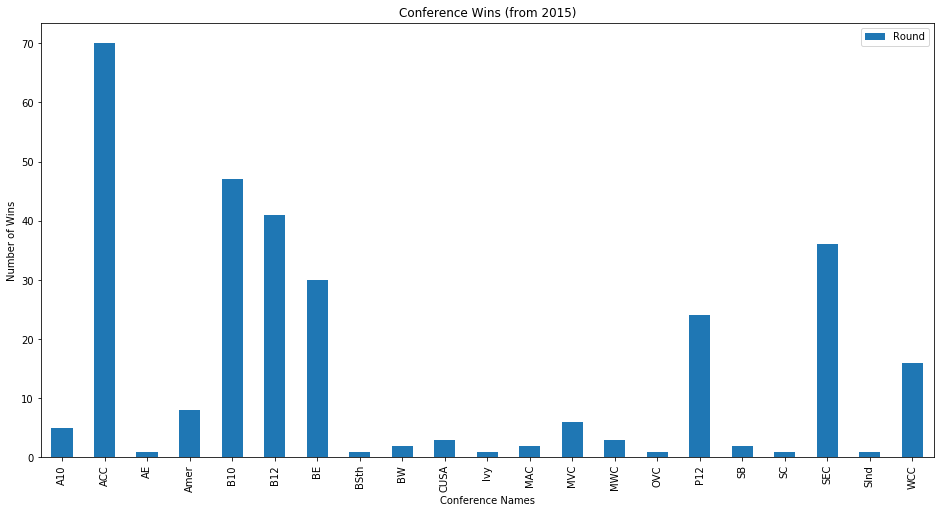

In [21]:
#Bar chart of wins from 2015 to most current
ax = dt.plot.bar(y='Round', figsize=(16,8))
ax.set_title("Conference Wins (from 2015)")
plt.ylabel("Number of Wins")
plt.xlabel("Conference Names")
plt.savefig('output_data/conf_wins.png')

In [22]:
#The Seed with the most wins in the past five years is #1
#...and strangely North Carolina is not in this Seed
winningSeed_count=rawdf_cbb.groupby(['Winning_Seed'])
dt2=winningSeed_count.count()
dt2Sorted=dt2.sort_values(["Winning_Team"],ascending=False).head(16)
dt2Sorted[["Round"]]

,Round
Winning_Seed,
1,67
2,42
3,38
4,28
5,24
7,21
11,18
9,15
6,12


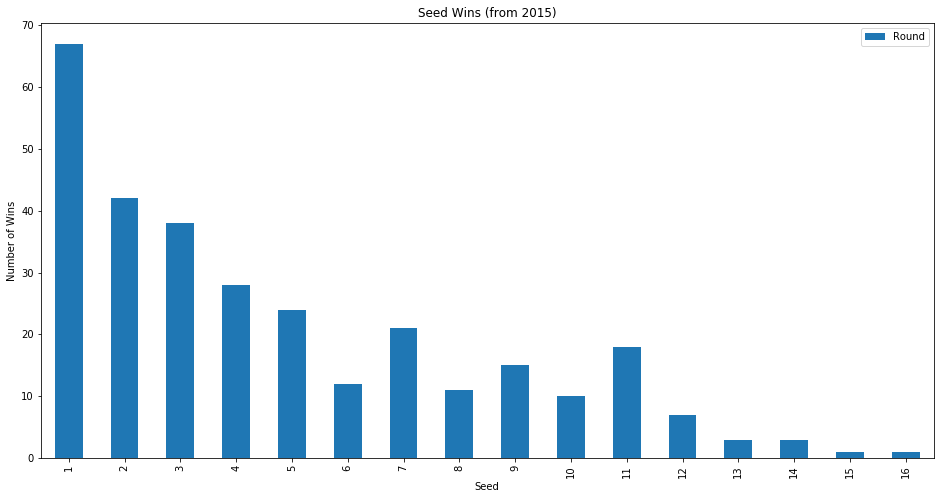

In [23]:
#Bar chart of wins from 2015 to most current
ax = dt2.plot.bar(y='Round', figsize=(16,8))
ax.set_title("Seed Wins (from 2015)")
plt.ylabel("Number of Wins")
plt.xlabel("Seed")
plt.savefig('output_data/seed_wins.png')

In [24]:
#The Seed with the most wins since '85 is #1
BDwinningSeed_count=rawdf_BigDance.groupby(['Winning_Seed'])
dt3=BDwinningSeed_count.count()
dt3Sorted=dt3.sort_values(["Winning_Team"],ascending=False).head(16)
dt3Sorted[["Round"]]

,Round
Winning_Seed,
1,469
2,332
3,261
4,215
5,156
6,150
7,127
8,98
10,87


Text(0.5, 0, 'Seed')

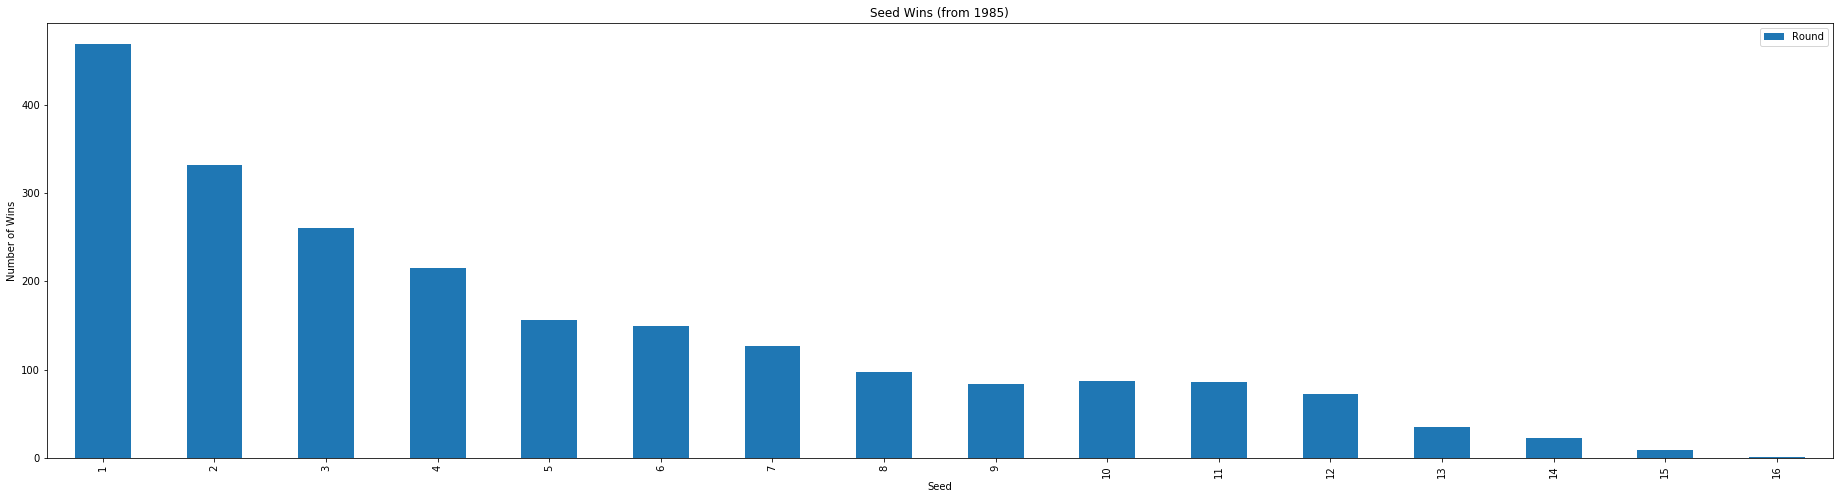

In [25]:
#Bar chart of wins from 1985 to most current
ax = dt3.plot.bar(y='Round', figsize=(32,8))
ax.set_title("Seed Wins (from 1985)")
plt.ylabel("Number of Wins")
plt.xlabel("Seed")

In [26]:
#Overall it is a good idea to have as much data as possible when forming an analysis on anything
#However it is just as important to understand what data is needed to form an accurate conclusion
#In this case, the data from the last five years is more relevant in the current March Madness